In [1]:
import numpy as np
import pandas as pd

# Excel ファイルから読み込み
df = pd.read_excel("excel_In_5Kpm_1.0mg_20250530.xlsx", skiprows=21, usecols="A:D")

df

,min,Cel,uW,uW/min
0,0.000000,146.280426,16.277863,-122.978760
1,0.003333,146.280396,16.683167,-121.214355
2,0.006667,146.280334,17.094360,-119.606323
3,0.010000,146.280212,17.503235,-118.037842
4,0.013333,146.280060,18.001099,-116.563110
...,...,...,...,...
3896,12.986667,144.132370,83.887787,-3.225403
3897,12.990000,144.132584,83.899567,-3.184937
3898,12.993333,144.132767,83.912445,-3.147766
3899,12.996667,144.132950,83.925522,-3.136230


In [2]:
df_edit  = df

In [3]:
mass = 0.0011 #)1.1 mg
g_mol = 114.818 #
mol = mass/g_mol 

df_edit ["time(s)"] = df_edit.iloc[:, 0] * 60
df_edit ["temp(K)"] = df_edit.iloc[:, 1] + 273.15
df_edit["dT/dt"] = (df_edit["temp(K)"].shift(1) - df_edit["temp(K)"]) - (df_edit["min"].shift(-1) - df_edit["min"])
df_edit["dT/dt"].fillna(0, inplace=True)
#df_edit["dT/dt"] = (df_edit["temp(K)"].shift(-1) - df_edit["temp(K)"]) - (df_edit["min"].shift(-1) - df_edit["time(s)"])

# C列*1.0*10^-6/G/(mass)　
df_edit["c"] = df_edit.iloc[:, 2]*0.000001/df_edit.iloc[:, 6]/mass

#
df_edit["dH/dt"] =df_edit.iloc[:, 2]*0.000001/mol

#
df_edit["dS/dt"] =df_edit.iloc[:, 2]*0.000001/mol/df_edit.iloc[:, 5]

df_edit.head(100)

,min,Cel,uW,uW/min,time(s),temp(K),dT/dt,c,dH/dt,dS/dt
0,0.000000,146.280426,16.277863,-122.978760,0.0,419.430426,0.000000,inf,1.699083,0.004051
1,0.003333,146.280396,16.683167,-121.214355,0.2,419.430396,-0.003303,-4.591995,1.741389,0.004152
2,0.006667,146.280334,17.094360,-119.606323,0.4,419.430334,-0.003272,-4.749056,1.784309,0.004254
3,0.010000,146.280212,17.503235,-118.037842,0.6,419.430212,-0.003211,-4.955070,1.826988,0.004356
4,0.013333,146.280060,18.001099,-116.563110,0.8,419.430060,-0.003181,-5.144906,1.878955,0.004480
...,...,...,...,...,...,...,...,...,...,...
95,0.316667,146.779785,-72.209381,554.154785,19.0,419.929785,-0.017738,3.700883,-7.537215,-0.017949
96,0.320000,146.794296,-74.025299,548.905518,19.2,419.944296,-0.017844,3.771243,-7.726761,-0.018399
97,0.323333,146.808990,-75.845734,542.815430,19.4,419.958990,-0.018028,3.824739,-7.916778,-0.018851
98,0.326667,146.823792,-77.657227,535.708374,19.6,419.973792,-0.018134,3.893023,-8.105861,-0.019301


Text(0, 0.5, 'Temperature (°C)')

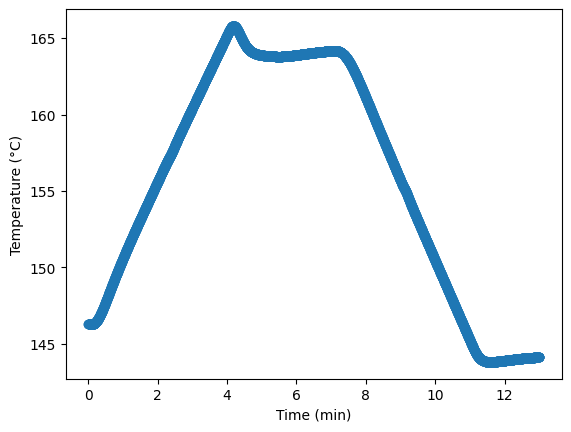

In [4]:
import matplotlib.pyplot as plt

# x 軸: min（時間） / y 軸: cel（摂氏温度）
plt.plot(df["min"], df["Cel"], marker='o', linestyle='-')

# ラベル・タイトル
plt.xlabel("Time (min)")
plt.ylabel("Temperature (°C)")
#plt.title("Temperature vs Time")

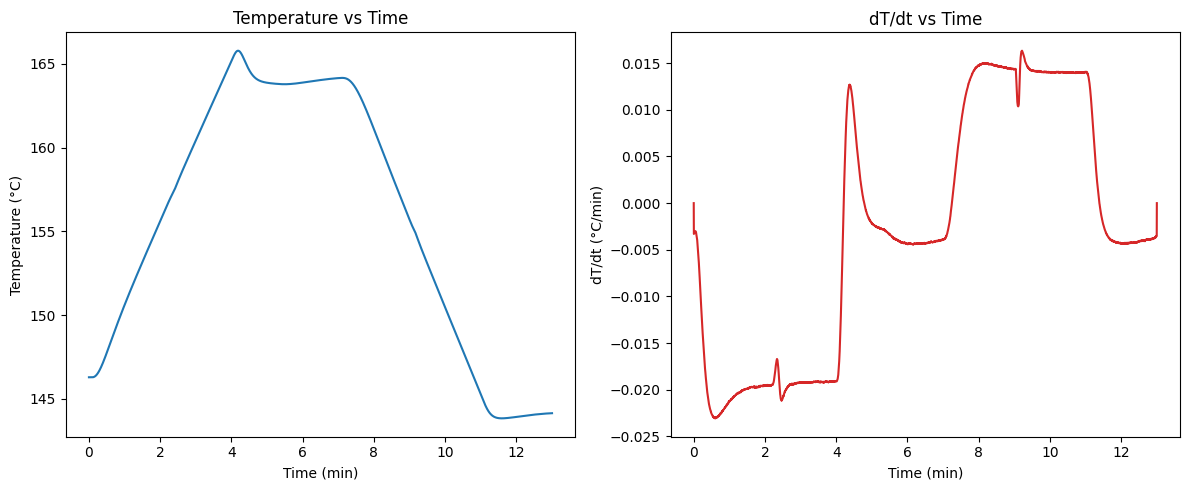

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

# 左側のグラフ: min vs cel
axes[0].plot(df["min"], df["Cel"], color='tab:blue')
axes[0].set_title("Temperature vs Time")
axes[0].set_xlabel("Time (min)")
axes[0].set_ylabel("Temperature (°C)")

# 右側のグラフ: min vs dT/dt
axes[1].plot(df["min"], df["dT/dt"], color='tab:red')
axes[1].set_title("dT/dt vs Time")
axes[1].set_xlabel("Time (min)")
axes[1].set_ylabel("dT/dt (°C/min)")


# レイアウト調整
plt.tight_layout()

# 表示
plt.show()

(-5.0, 400.0)

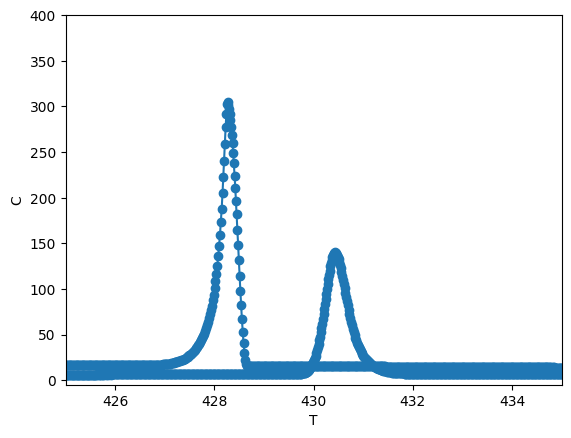

In [6]:
import matplotlib.pyplot as plt

plt.plot(df["temp(K)"], df["c"], marker='o', linestyle='-')

# ラベル・タイトル
plt.xlabel("T")
plt.ylabel("C")

plt.xlim([425,435])
plt.ylim([-5,400])
#plt.title("Temperature vs Time")

In [ ]:
import matplotlib.pyplot as plt

# データの長さを取得して半分に分割
mid_index = len(df) // 2
df_first = df.iloc[:mid_index]
df_second = df.iloc[mid_index:]

# プロット
plt.plot(df_first["temp(K)"], df_first["c"], marker='o', linestyle='-', label='Heating', color='blue')
plt.plot(df_second["temp(K)"], df_second["c"], marker='s', linestyle='--', label='Cooling', color='red')

# ラベル・軸範囲など
plt.xlabel("T")
plt.ylabel("C")
plt.xlim([425, 435])
plt.ylim([-5, 400])
plt.legend()
#plt.title("Temperature vs Time")

plt.show()

Text(0, 0.5, 'dH/dt')

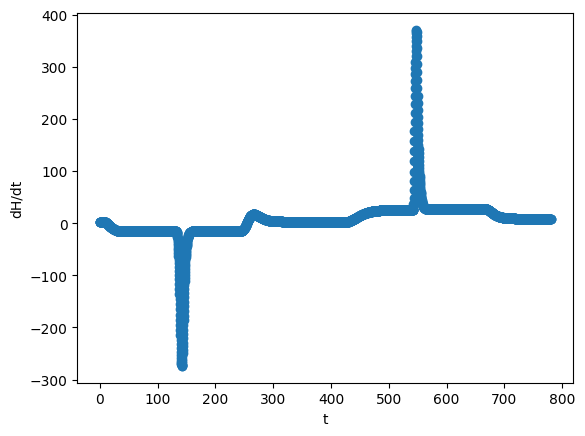

In [7]:
import matplotlib.pyplot as plt

# x 軸: min（時間） / y 軸: cel（摂氏温度）
plt.plot(df["time(s)"], df["dH/dt"], marker='o', linestyle='-')

# ラベル・タイトル
plt.xlabel("t")
plt.ylabel("dH/dt")

#plt.xlim([425,435])
#plt.ylim([-5,400])
#plt.title("Temperature vs Time")

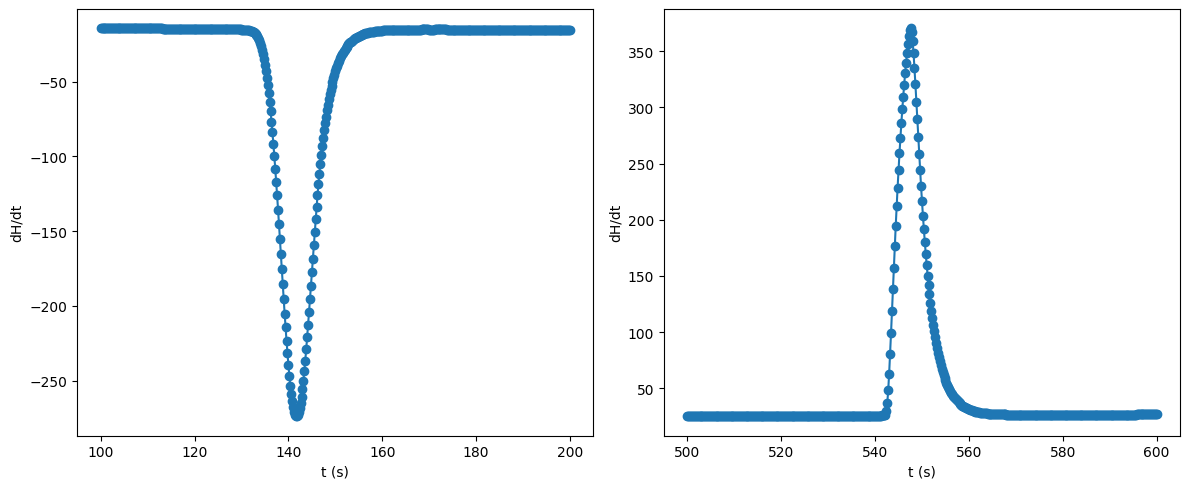

In [8]:
# 範囲指定できる
df_100_200 = df[(df["time(s)"] >= 100) & (df["time(s)"] <= 200)]
df_500_600 = df[(df["time(s)"] >= 500) & (df["time(s)"] <= 600)]

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 横に並べる

# グラフ1：100〜200秒
axes[0].plot(df_100_200["time(s)"], df_100_200["dH/dt"], marker='o', linestyle='-')
axes[0].set_xlabel("t (s)")
axes[0].set_ylabel("dH/dt")

# グラフ2：500〜600秒
axes[1].plot(df_500_600["time(s)"], df_500_600["dH/dt"], marker='o', linestyle='-')
axes[1].set_xlabel("t (s)")
axes[1].set_ylabel("dH/dt")

# レイアウト整形
plt.tight_layout()
plt.show()

Text(0, 0.5, 'dS/dt')

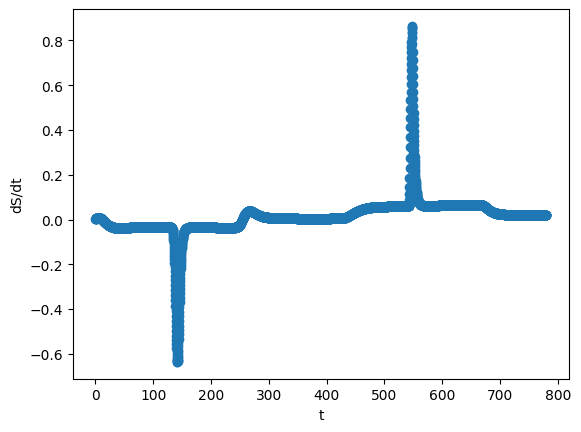

In [9]:
import matplotlib.pyplot as plt

# x 軸: min（時間） / y 軸: cel（摂氏温度）
plt.plot(df["time(s)"], df["dS/dt"], marker='o', linestyle='-')

# ラベル・タイトル
plt.xlabel("t")
plt.ylabel("dS/dt")

#plt.xlim([425,435])
#plt.ylim([-5,400])
#plt.title("Temperature vs Time")

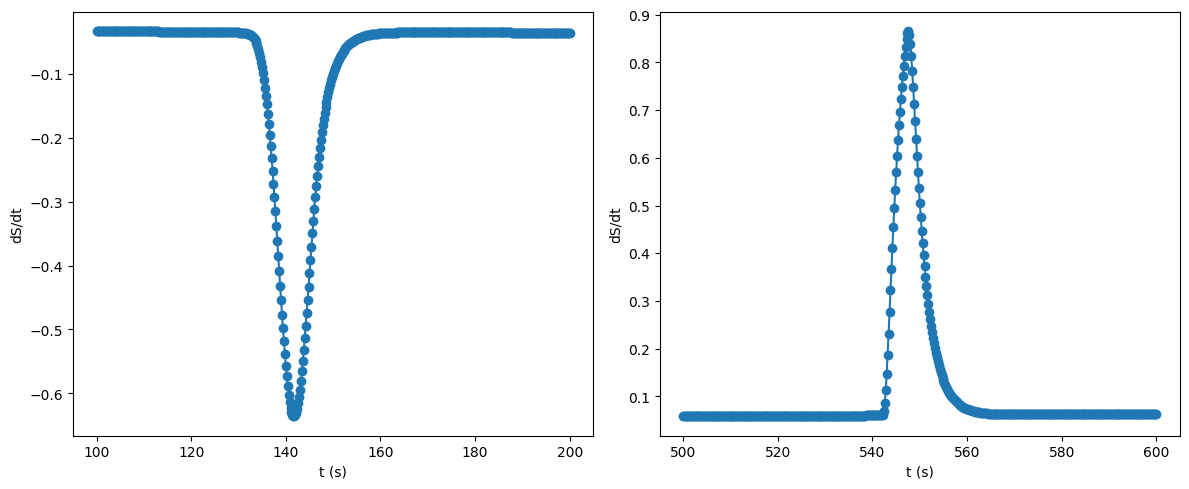

In [10]:
# 範囲指定できる
df_100_200 = df[(df["time(s)"] >= 100) & (df["time(s)"] <= 200)]
df_500_600 = df[(df["time(s)"] >= 500) & (df["time(s)"] <= 600)]

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 横に並べる

# グラフ1：100〜200秒
axes[0].plot(df_100_200["time(s)"], df_100_200["dS/dt"], marker='o', linestyle='-')
axes[0].set_xlabel("t (s)")
axes[0].set_ylabel("dS/dt")

# グラフ2：500〜600秒
axes[1].plot(df_500_600["time(s)"], df_500_600["dS/dt"], marker='o', linestyle='-')
axes[1].set_xlabel("t (s)")
axes[1].set_ylabel("dS/dt")

# レイアウト整形
plt.tight_layout()
plt.show()